In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
engineered_df = pd.read_csv("./Data/churn_amazon_prime_users.csv" )
engineered_df.columns

Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Location', 'Membership Start Date', 'Membership End Date',
       'Payment Information', 'Renewal Status', 'Usage Frequency',
       'Purchase History', 'Favorite Genres', 'Devices Used',
       'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions', 'Membership Duration (Days)', 'Age',
       'Days Since Membership Start', 'Gender__Female', 'Gender__Male',
       'Plan__Annual', 'Plan__Monthly', 'Uses_Mobile', 'Uses_Desktop',
       'Uses_Tablet', 'Uses_Smart TV', 'Genre_['Documentary']',
       'Genre_['Horror']', 'Genre_['Comedy']', 'Genre_['Action']',
       'Genre_['Drama']', 'Genre_['Sci-Fi']', 'Genre_['Romance']', 'Churned'],
      dtype='object')

In [3]:
# Assuming 'Churned' is your target variable
X = engineered_df.drop(['Churned','User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Location', 'Membership Start Date', 'Membership End Date',
       'Payment Information', 'Renewal Status', 'Usage Frequency',
       'Purchase History', 'Favorite Genres', 'Devices Used',
       'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions', 'Membership Duration (Days)', 'Age',
       'Days Since Membership Start'], axis=1)  # Drop the 'Name' column
y = engineered_df['Churned']

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.76


In [7]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.0


c:\Users\lualg\anaconda3\envs\pycaret_2024\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.0


In [9]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

F1-Score: 0.0


In [10]:
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc}")

AUC-ROC: 0.5


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

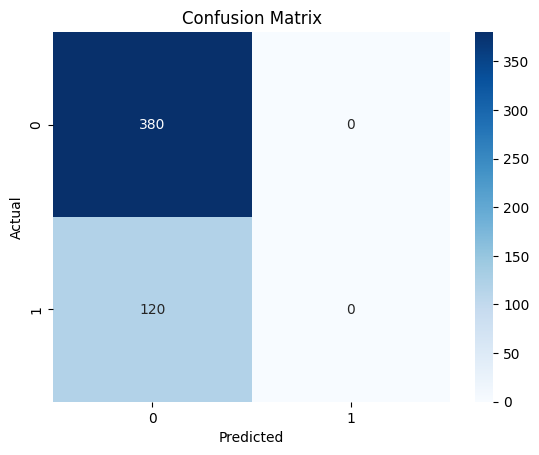

In [14]:
# Test Confusion Matrix Graph
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

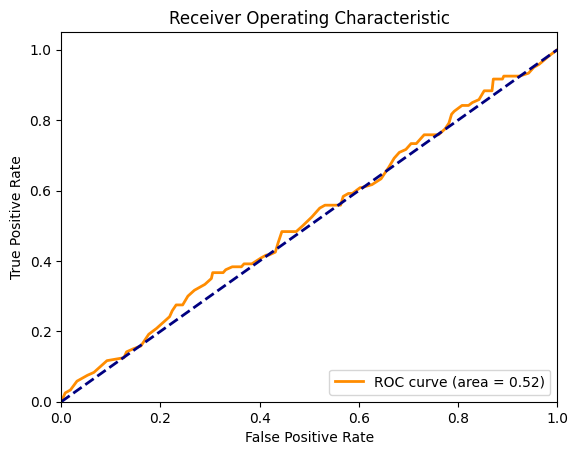

In [17]:
# Testing ROC Curve Graph
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1]) 
roc_auc = auc(fpr, tpr) 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()